In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split

%matplotlib inline

In [4]:
df = pandas.read_csv('trainset.rbs1.v2.csv', delimiter=',')

In [5]:
df.head()

,Construct,Barcode,rbs1_1_A,rbs1_1_C,rbs1_1_G,rbs1_1_T,rbs1_2_A,rbs1_2_C,rbs1_2_G,rbs1_2_T,...,rbs2_3_A,rbs2_3_C,rbs2_3_G,rbs2_3_T,Group,ODind,ODhar,FC,rbs1,rbs2
0,RBS629,77DD32,0,0,1,0,0,0,1,0,...,0,0,1,0,Top,0.410,4.523,1.437982,GGG,GGG
1,RBS678,77DD39,0,0,1,0,0,0,1,0,...,0,0,1,0,Top,0.359,2.678,1.277175,GGG,GGG
2,RBS353,77DD18,0,0,1,0,0,0,1,0,...,0,0,1,0,Top,0.334,1.745,1.545141,GGC,GGG
3,RBS403,77DD20,0,0,1,0,0,0,1,0,...,1,0,0,0,Top,0.390,2.166,1.670098,GGC,GGA
4,RBS500,77DD24,0,0,1,0,0,0,1,0,...,0,1,0,0,Top,0.375,2.348,1.621230,GGC,GGC


In [12]:
# use one-hot-encoding of rbs1 and rbs2 as features
X = df.iloc[:,2:26]

# use FC as label 
# TODO: need to transform FC to give Gaussian Noise
y = df['FC']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### linear regression


In [38]:
reg = LinearRegression().fit(X_train,y_train)
prediction = reg.predict(X_test)

train_error = reg.score(X_train, y_train)
test_error = reg.score(X_test, y_test)

print('train error: ', train_error)
print('test error: ', test_error)

train error:  0.7685109930382291
test error:  0.7411726652568567


### plot prediction vs. true label

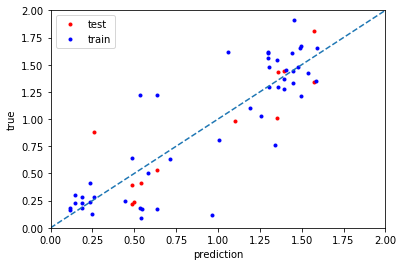

In [29]:
plt.plot(prediction, y_test, 'r.', label = 'test')
plt.plot(reg.predict(X_train), y_train, 'b.', label = 'train')
plt.plot([0,2], [0,2], '--')
plt.xlabel('prediction')
plt.ylabel('true')
plt.xlim(0,2)
plt.ylim(0,2)
plt.legend()

### Histogram of noise

(array([ 1.,  1.,  2.,  8., 14., 15., 10.,  4.,  1.,  4.]),
 array([-0.84808061, -0.69427388, -0.54046715, -0.38666042, -0.23285369,
        -0.07904696,  0.07475978,  0.22856651,  0.38237324,  0.53617997,
         0.6899867 ]),
 <a list of 10 Patch objects>)

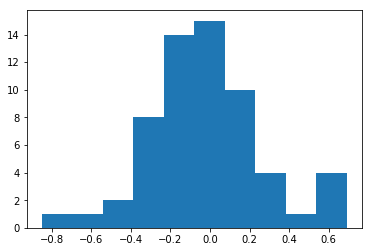

In [34]:
plt.hist(y - reg.predict(X))

 ### Kernel Ridge

In [43]:
kernelreg = KernelRidge(kernel = 'rbf').fit(X_train,y_train)
prediction = kernelreg.predict(X_test)

train_error = kernelreg.score(X_train, y_train)
test_error = kernelreg.score(X_test, y_test)

print('train error: ', train_error)
print('test error: ', test_error)

train error:  0.6832510522293269
test error:  0.614723108043854


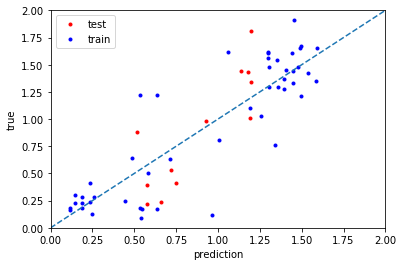

In [44]:
plt.plot(prediction, y_test, 'r.', label = 'test')
plt.plot(reg.predict(X_train), y_train, 'b.', label = 'train')
plt.plot([0,2], [0,2], '--')
plt.xlabel('prediction')
plt.ylabel('true')
plt.xlim(0,2)
plt.ylim(0,2)
plt.legend()